### 3.1 Tensor操作
[官方链接](https://pytorch.org/docs/)

In [1]:
#let's do it
from __future__ import print_function
import torch as t
t.__version__

'1.1.0'

In [73]:
#指定tensor的形状
a = t.Tensor(2, 3)
a

tensor([[-7.5539e-18,  3.0651e-41, -7.5514e-18],
        [ 3.0651e-41,  1.4013e-45,  0.0000e+00]])

In [74]:
#直接用list创建一个tensor
b = t.Tensor([[1, 2, 3],
             [5, 6, 7]])
b

tensor([[1., 2., 3.],
        [5., 6., 7.]])

In [75]:
print(type(b.tolist()))
b_size = b.size()
b_size

<class 'list'>


torch.Size([2, 3])

In [76]:
#输出tensor b 中的总数目
b.numel()

6

In [77]:
# 创建一个相同的tensor
c = t.Tensor(b_size)
d = t.Tensor((2, 3))
#f = t.Tensor(4, 6)
c, d

(tensor([[-7.1623e-18,  3.0651e-41,  1.8334e+34],
         [ 4.5713e-41,  4.4842e-44,  0.0000e+00]]), tensor([2., 3.]))

In [78]:
print("Shape: ", c.shape)
print("Size: ", c.size())

Shape:  torch.Size([2, 3])
Size:  torch.Size([2, 3])


In [79]:
t.ones(2, 3)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [80]:
t.zeros(2, 3)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [81]:
a = t.arange(1, 70, 5)#step 起步
a.shape

torch.Size([14])

In [82]:
b = t.linspace(1, 10, 6)#划分
b

tensor([ 1.0000,  2.8000,  4.6000,  6.4000,  8.2000, 10.0000])

In [83]:
#0-1之间的随机变量
t.randn(2, 3, device=t.device("cpu"))

tensor([[-0.8532,  0.3603,  0.0475],
        [-1.1802,  0.2131, -1.0545]])

In [84]:
t.randperm(10)#生成随机的括号以内的十个数字

tensor([3, 5, 8, 9, 1, 7, 4, 2, 0, 6])

In [85]:
t.eye(2, 3, dtype=t.int)

tensor([[1, 0, 0],
        [0, 1, 0]], dtype=torch.int32)

In [86]:
# torch.tensor
scalar = t.tensor(3.1415)
scalar, scalar.shape

(tensor(3.1415), torch.Size([]))

In [87]:
vector = t.tensor([2, 3])

print(vector, vector.shape)

vector1 = t.Tensor([2, 3])

print(vector1, vector1.shape)

tensor([2, 3]) torch.Size([2])
tensor([2., 3.]) torch.Size([2])


In [88]:
matrix = t.tensor([[0.1, 1.2],
                   [2.4, 5.6],
                   [4.1, 5.3]])
matrix, matrix.shape

(tensor([[0.1000, 1.2000],
         [2.4000, 5.6000],
         [4.1000, 5.3000]]), torch.Size([3, 2]))

In [89]:
t.tensor([[2.11111, 5.222, 6.123]], dtype=t.float64, 
         device=t.device("cuda"))

tensor([[2.1111, 5.2220, 6.1230]], device='cuda:0', dtype=torch.float64)

In [90]:
empty_tensor = t.tensor([])
empty_tensor.shape

torch.Size([0])

### 常见Tensor操作
通过`tensor.view`方法可以调整tensor的形状，但必须保证调整前后元素总数一致。`view`不会修改自身的数据，**返回的新tensor与源tensor共享内存**，也即更改其中的一个，另外一个也会跟着改变。在实际应用中可能经常需要添加或减少某一维度，这时候`squeeze`和`unsqueeze`两个函数就派上用场了。

In [91]:
a = t.arange(0, 6)
print(a)
a.view(2, 3)#可以拉伸tendor形状　
#a.reshape(3, 2)

tensor([0, 1, 2, 3, 4, 5])


tensor([[0, 1, 2],
        [3, 4, 5]])

In [92]:
#自动计算的view的形状
b = a.view(-1, 3)
b

tensor([[0, 1, 2],
        [3, 4, 5]])

**不理解**

In [93]:
b.unsqueeze(1) #增加数据维度
b[:, None].shape
b.unsqueeze(-2) # -2表示倒数第二个维度
c = b.view(1, 1, 1, 2, 3)
c.squeeze(0) # 压缩第0维的“１”
c.squeeze() # 把所有维度为“1”的压缩
a[1] = 100
b # a修改，b作为view之后的，也会跟着修改

tensor([[  0, 100,   2],
        [  3,   4,   5]])

**squeeze()：**squeeze(arg)表示第arg维的维度值为1，则去掉该维度。否则tensor不变。（即若tensor.shape()[arg] = 1，则去掉该维度）

In [94]:
b = t.Tensor(1, 3)
b
b.shape

torch.Size([1, 3])

In [95]:
b.squeeze(0)

tensor([6.7333e+22, 1.7591e+22, 1.7184e+25])

**unsqueeze()：**unsqueeze(arg)与squeeze(arg)作用相反，表示在第arg维增加一个维度值为1的维度

In [96]:
b = t.Tensor(3)
b.shape

torch.Size([3])

In [97]:
b.unsqueeze(1)

tensor([[-7.4917e-18],
        [ 3.0651e-41],
        [-7.4889e-18]])

In [98]:
#resize函数
print(b.shape)

b.resize_(1, 3)

torch.Size([3])


tensor([[-7.4917e-18,  3.0651e-41, -7.4889e-18]])

In [99]:
b.resize_(3, 3)
b

tensor([[-7.4917e-18,  3.0651e-41, -7.4889e-18],
        [ 1.7220e+22,  3.7771e-08,  6.6468e+22],
        [ 2.5787e-09,  1.6690e-07,  5.4412e-05]])

In [100]:
#索引操作
a = t.randn(3, 4)
print(a)

tensor([[ 0.3680, -0.2911,  2.3358,  0.6494],
        [ 0.3013,  3.4309, -1.1276,  0.9168],
        [-1.9001,  0.1549, -0.7944, -0.0725]])


In [101]:
print(a[0:1, :2])#取得某部分
print(a[0, :2])#取得数值
print(a[:2])

tensor([[ 0.3680, -0.2911]])
tensor([ 0.3680, -0.2911])
tensor([[ 0.3680, -0.2911,  2.3358,  0.6494],
        [ 0.3013,  3.4309, -1.1276,  0.9168]])


In [102]:
# None类似于np.newaxis, 为a新增了一个轴
# 等价于a.view(1, a.shape[0], a.shape[1])
a[None].shape

torch.Size([1, 3, 4])

In [103]:
#使用None增加数据维度
b = a[None,:,None,:, None]
b.shape
b

tensor([[[[[ 0.3680],
           [-0.2911],
           [ 2.3358],
           [ 0.6494]]],


         [[[ 0.3013],
           [ 3.4309],
           [-1.1276],
           [ 0.9168]]],


         [[[-1.9001],
           [ 0.1549],
           [-0.7944],
           [-0.0725]]]]])

In [104]:
print(a)
a > 1 #返回一个矩阵，用１表示正确的抉择

tensor([[ 0.3680, -0.2911,  2.3358,  0.6494],
        [ 0.3013,  3.4309, -1.1276,  0.9168],
        [-1.9001,  0.1549, -0.7944, -0.0725]])


tensor([[0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 0]], dtype=torch.uint8)

In [105]:
a[a>1] # 等价于a.masked_select(a>1)
# 选择结果与原tensor不共享内存空间

tensor([2.3358, 3.4309])

In [106]:
a[t.LongTensor([0, 1])]

tensor([[ 0.3680, -0.2911,  2.3358,  0.6494],
        [ 0.3013,  3.4309, -1.1276,  0.9168]])

In [107]:
a = t.arange(0, 16).view(4, 4)
a

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]])

In [108]:
#主对角线
index = t.LongTensor([[0, 1, 2, 3]])#索引值必须为LongTensor类型
a.gather(0, index)

tensor([[ 0,  5, 10, 15]])

In [109]:
#反对角线
index = t.LongTensor([[3, 2, 1, 0]]).t()#装置矩阵
print(index)
a.gather(1, index)

tensor([[3],
        [2],
        [1],
        [0]])


tensor([[ 3],
        [ 6],
        [ 9],
        [12]])

In [110]:
#取反对角元素
index = t.LongTensor([[3, 2, 1, 0]])
a.gather(0, index)


tensor([[12,  9,  6,  3]])

In [111]:
#取双对角线元素
index = t.LongTensor([[0, 1, 2, 3],
                    [3, 2, 1, 0]]).t()
print(index)
b = a.gather(1, index)
print(b)

tensor([[0, 3],
        [1, 2],
        [2, 1],
        [3, 0]])
tensor([[ 0,  3],
        [ 5,  6],
        [10,  9],
        [15, 12]])


### 7.20 下午　天气晴朗

In [112]:
c = t.zeros(4, 4)
print(c)
print(b)
print(index)
c.scatter_(1, index, b)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[ 0,  3],
        [ 5,  6],
        [10,  9],
        [15, 12]])
tensor([[0, 3],
        [1, 2],
        [2, 1],
        [3, 0]])


RuntimeError: Expected object of scalar type Float but got scalar type Long for argument #4 'src'

In [113]:
a [0, 0]

tensor(0)

In [114]:
a[0, 0].item()

0

In [115]:
d = a[0:1, 0:1, None]
print("Shape", d.shape)
d.item() #取出数据对象的元素

Shape torch.Size([1, 1, 1])


0

In [116]:
x = t.arange(0, 27).view(3, 3, 3)

x

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[ 9, 10, 11],
         [12, 13, 14],
         [15, 16, 17]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

In [117]:
x[0][0][0]
print("Show Time!")

Show Time!


In [118]:
x[[1, 2], [1, 2], [2, 0]]

tensor([14, 24])

In [119]:
x[[2, 1, 0],[1], [0]]

tensor([21, 12,  3])

In [120]:
x[[0, 2], ...]

tensor([[[ 0,  1,  2],
         [ 3,  4,  5],
         [ 6,  7,  8]],

        [[18, 19, 20],
         [21, 22, 23],
         [24, 25, 26]]])

### 数据类型的设置

In [121]:
#设置默认的数据类型
t.set_default_tensor_type('torch.DoubleTensor')
a = t.Tensor(3, 3)
a.dtype

torch.float64

In [122]:
#调回默认的设置
t.set_default_tensor_type('torch.FloatTensor')
b = t.Tensor(4, 5)
b.dtype

torch.float32

In [123]:
#变换数据类型
c = a.type_as(b)
print(c.dtype)
print(c)

torch.float32
tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.3103e-33, 0.0000e+00, 0.0000e+00]])


In [124]:
a.new(2, 3)

tensor([[6.7904e-313, 5.3028e+180,  3.3103e-33],
        [ 6.9740e-76,  4.2613e-86, 3.3566e-143]], dtype=torch.float64)

In [125]:
t.zeros_like(a, dtype=t.int16)#修改数据类型

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]], dtype=torch.int16)

In [126]:
#随机矩阵
t.rand_like(a)

tensor([[0.4738, 0.6314, 0.7452],
        [0.4444, 0.5457, 0.3148],
        [0.3730, 0.0779, 0.8540]], dtype=torch.float64)

In [127]:
a.new_ones(4, 5, dtype=t.int)
a

tensor([[4.6416e-310, 7.9545e-322, 6.9225e-310],
        [7.1640e-322, 6.9225e-310, 4.6416e-310],
        [ 3.3103e-33, 1.6304e-322, 4.6416e-310]], dtype=torch.float64)

In [128]:
m = a.new_tensor([3,4])
m

tensor([3., 4.], dtype=torch.float64)

### 逐个元素操作
**注意：**输入和输出的size必须相同

In [129]:

a = t.arange(0, 6, dtype=t.float).view(2, 3)
print(a.dtype)
t.cos(a)#a不能为整数

torch.float32


tensor([[ 1.0000,  0.5403, -0.4161],
        [-0.9900, -0.6536,  0.2837]])

In [130]:
a%3

tensor([[0., 1., 2.],
        [0., 1., 2.]])

In [131]:
print(a)
print("翻倍：",a ** 2)


tensor([[0., 1., 2.],
        [3., 4., 5.]])
翻倍： tensor([[ 0.,  1.,  4.],
        [ 9., 16., 25.]])


In [134]:
# 取a中的每一个元素与3相比较大的一个 (小于3的截断成3)
print("src:", a)
t.clamp(a, min = 3, max = 4)

src: tensor([[0., 1., 2.],
        [3., 4., 5.]])


tensor([[3., 3., 3.],
        [3., 4., 4.]])

In [141]:
b = a.sin()
print(b)

tensor([[ 0.0000,  0.8415,  0.9093],
        [ 0.1411, -0.7568, -0.9589]])


In [143]:
b = a.sin_()#修改函数值
a 

tensor([[ 0.0000,  0.7456,  0.7891],
        [ 0.1407, -0.6866, -0.8186]])

### 归并操作
假设输入的形状是(m, n, k)

- 如果指定dim=0，输出的形状就是(1, n, k)或者(n, k)
- 如果指定dim=1，输出的形状就是(m, 1, k)或者(m, k)
- 如果指定dim=2，输出的形状就是(m, n, 1)或者(m, n)

size中是否有"1"，取决于参数`keepdim`，`keepdim=True`会保留维度`1`。注意，以上只是经验总结，并非所有函数都符合这种形状变化方式，如`cumsum`。

In [148]:
b = t.ones(2, 3)
print(b)
b.sum(dim=1, keepdim=True).shape

tensor([[1., 1., 1.],
        [1., 1., 1.]])


torch.Size([2, 1])

In [150]:
b.sum(dim=1, keepdim=False).shape

torch.Size([2])

In [154]:
a = t.arange(0, 6).view(2, 3)
print(a)
a.cumsum(dim=0)#按列展开相加

tensor([[0, 1, 2],
        [3, 4, 5]])


tensor([[0, 1, 2],
        [3, 5, 7]])

### 比较

In [157]:
a = t.linspace(0, 15, 6).view(2, 3)
b = t.linspace(15, 0, 6).view(2, 3)

In [162]:
print(" a:", a," \n","b:", b)

 a: tensor([[ 0.,  3.,  6.],
        [ 9., 12., 15.]])  
 b: tensor([[15., 12.,  9.],
        [ 6.,  3.,  0.]])


In [165]:
a[a > b]#取出a中a>b的元素

tensor([ 9., 12., 15.])

In [166]:
#选取最大值
t.max(a)

tensor(15.)

In [167]:
t.max(a, dim=1)

torch.return_types.max(
values=tensor([ 6., 15.]),
indices=tensor([2, 2]))

### 线性代数

In [171]:
b = a.t()
b.is_contiguous
b

tensor([[ 0.,  9.],
        [ 3., 12.],
        [ 6., 15.]])

### Numpy 和　Tensor


In [174]:
import numpy as np
a = np.ones([2, 3], dtype=np.float32)
print(a)

[[1. 1. 1.]
 [1. 1. 1.]]


In [184]:
#转为torch类型
b = t.from_numpy(a)
c = b.numpy()
print(b)
print(c)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
[[1. 1. 1.]
 [1. 1. 1.]]


In [186]:
#方法二
b = t.Tensor(a)
b

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [191]:
#g共享内存
a[0, 1] = 100
print(a, "\n", b, '\n', c)

[[  1. 100.   1.]
 [  1.   1.   1.]] 
 tensor([[  1., 100.,   1.],
        [  1.,   1.,   1.]]) 
 [[  1. 100.   1.]
 [  1.   1.   1.]]


In [207]:
a = np.ones([2, 3])
a.dtype

dtype('float64')

In [209]:
b = t.Tensor(a)
print(b)
a[0, 1] = 12

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [214]:
#t.tenxor()无论如何不会共享内存结构
b = t.tensor(a)


In [216]:
print(a.dtype)
a[0, 1] = 110
print(a)
print(b.dtype)
print(b)

float64
[[  1. 110.   1.]
 [  1.   1.   1.]]
torch.float64
tensor([[ 1., 12.,  1.],
        [ 1.,  1.,  1.]], dtype=torch.float64)


In [220]:
#广播机制
a = t.ones(2, 3)
b = t.zeros(1, 2, 3)
print((a+b).storage())

 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
[torch.FloatStorage of size 6]


In [221]:
a = t.arange(0, 6)
a.storage()

 0
 1
 2
 3
 4
 5
[torch.LongStorage of size 6]

In [226]:
b = a.view(2, 3)
id(b)

140110626549832

In [228]:
id(b.storage()) == id(a.storage())

True

In [229]:
a[1] = 100
b

tensor([[  0, 100,   2],
        [  3,   4,   5]])

In [230]:
b.storage()

 0
 100
 2
 3
 4
 5
[torch.LongStorage of size 6]

In [231]:
print(a.data_ptr)
print(b.data_ptr)


<built-in method data_ptr of Tensor object at 0x7f6e0c21aaf8>
<built-in method data_ptr of Tensor object at 0x7f6e0c1ff048>


### GPU/CPU

In [4]:
a = t.rand(3, 4)
print(a.device)

if t.cuda.is_available():
    a = t.randn(2, 3, device=t.device("cuda"))
    print(a.device)
#一般写法
if t.cuda.is_available():
    a = t.rand(2, 5, device=t.device("cuda"))
    print(a.device)

cpu
cuda:0
cuda:0


In [242]:
b = t.rand(2, 33).cuda(0)
b.dev

tensor([[0.6531, 0.8688, 0.3109, 0.6763, 0.5518, 0.8907, 0.1803, 0.6584, 0.6639,
         0.4149, 0.6205, 0.1688, 0.5466, 0.7524, 0.8596, 0.5248, 0.7457, 0.9987,
         0.6735, 0.3179, 0.7182, 0.9954, 0.9559, 0.6806, 0.3087, 0.0805, 0.6221,
         0.8321, 0.6656, 0.8695, 0.5053, 0.2370, 0.8954],
        [0.7176, 0.9815, 0.0329, 0.1809, 0.4188, 0.5437, 0.3286, 0.0797, 0.4995,
         0.1284, 0.1182, 0.2696, 0.6135, 0.3542, 0.1394, 0.4429, 0.8114, 0.0198,
         0.9300, 0.3039, 0.9493, 0.9565, 0.2100, 0.8122, 0.1476, 0.5437, 0.0038,
         0.0996, 0.0829, 0.3963, 0.0411, 0.0742, 0.9193]], device='cuda:0')

In [6]:
device = t.device("cpu")
a.to(device)

tensor([[0.1093, 0.9103, 0.1927, 0.5328, 0.8111],
        [0.2223, 0.7982, 0.4111, 0.6625, 0.8095]])

In [5]:
if t.cuda.is_available():
    print("a", a)
    a = a.cuda(0)
    t.save(a, "a.pth")
    print(id(a))
    b = t.load("a.pth")
    print("b:", b)
    c = t.load('a.pth', map_location=lambda storage, loc: storage)
    # 加载为d, 存储于GPU0上
    d = t.load('a.pth', map_location={'cuda:1':'cuda:0'})

a tensor([[0.1093, 0.9103, 0.1927, 0.5328, 0.8111],
        [0.2223, 0.7982, 0.4111, 0.6625, 0.8095]], device='cuda:0')
140137492395352
b: tensor([[0.1093, 0.9103, 0.1927, 0.5328, 0.8111],
        [0.2223, 0.7982, 0.4111, 0.6625, 0.8095]], device='cuda:0')


### 向量化数据

In [14]:
a = t.arange(0, 20000000, dtype=t.int32)
print(a[-1], a[-2])
print(a.dtype)
b = t.LongTensor()
t.arange(0, 200000000, out=b)
print(b[-1], b[-2])

tensor(19999999, dtype=torch.int32) tensor(19999998, dtype=torch.int32)
torch.int32
tensor(199999999) tensor(199999998)


In [15]:
a = t.rand(2, 3)
a

tensor([[0.1053, 0.8871, 0.3489],
        [0.8221, 0.5341, 0.7845]])

In [16]:
t.set_printoptions(precision=10)
a


tensor([[0.1053050160, 0.8870914578, 0.3489065766],
        [0.8221467137, 0.5340746641, 0.7845124602]])

### 线性回归测试

In [35]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

device = t.device('cpu') #如果你想用gpu，改成t.device('cuda:0')

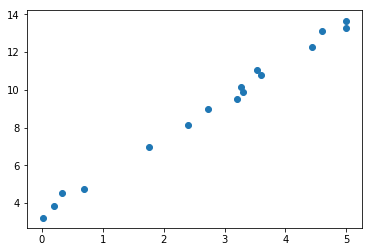

In [36]:
#设置随机数种子
t.manual_seed(10000)

def get_fakedata(batch_size = 8):
    
    #make x
    x = t.rand(batch_size, 1, device=device) * 5
    y = x*2 + 3 + t.rand(batch_size, 1, device=(device))# 添加一些噪声
        
    return x, y

#数据分布
x, y = get_fakedata(batch_size=16)
plt.scatter(x.squeeze().cpu().numpy(), y.squeeze().cpu().numpy())

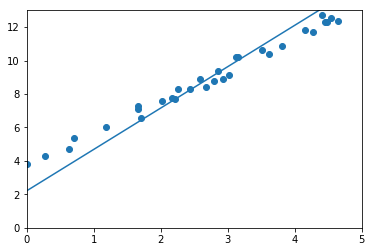

<Figure size 432x288 with 0 Axes>

w =  2.444845676422119 b =  2.193729877471924


In [37]:
#初始化权重和偏差
w = t.rand(1, 1).to(device).float()
b = t.zeros(1, 1).to(device)

#learning rate
lr = 0.02

for ii in range(1000):
    x, y = get_fakedata(batch_size=4)
    
    #1.计算结果
    y_pred = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y_pred - y)**2
    loss = loss.mean()
    
    #2.BP
    dloss = 1
    dy_pred = dloss*(y_pred - y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    #update
    w.sub_(lr*dw)
    b.sub_(lr*dw)
    
    if ii%50 == 0:
        
        display.clear_output(wait=True)
        x = t.arange(0, 6).view(-1, 1).float()
        y = x.mm(w) + b.expand_as(x)
        plt.plot(x.cpu().numpy(), y.cpu().numpy())# 预测值
        
        x2, y2 = get_fakedata(batch_size=32)
        plt.scatter(x2.numpy(), y2.numpy())# 真实值
        
        plt.xlim(0, 5)
        plt.ylim(0, 13)        
        plt.pause(0.5)
        #plt.title("line")
        plt.savefig("线性函数描绘图")
        plt.show()

        
        
        
print("w = ", w.item(), "b = ", b.item())


### 代码问题
```
RuntimeError                              Traceback (most recent call last)
<ipython-input-12-6c850e463534> in <module>()
     29         display.clear_output(wait=True)
     30         x = t.arange(0, 6).view(-1, 1)
---> 31         y = x.mm(w) + b.expand_a(x)
     32         plt.plot(x.cpu().numpy(), y.cpu().numpy())

RuntimeError: Expected object of scalar type Long but got scalar type Float for argument #2 'mat2'
```

解决：
在w, b后面加上flaot()